# Imports

In [1]:
from config import *
from core import *
from helper import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import numpy as np
from scipy.optimize import least_squares

# Config

In [2]:
frequencies = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
bases = [10, 15, 20]
qtables = [JPEG_STD_LUM]

# Run Sample

In [4]:
base = bases[0]
img = load_img_from_url(SAMPLE_IMG_URLS[2])

# Get DCT Coefficients
dct_coeffs = get_image_dct_coefs(img, frequencies, qtables)

# Get DCT Coefficient First Digits
fds = dct_coeff_to_first_digit(dct_coeffs, base)

# Get FD pmf
pmf = get_dct_fd_pmf(fds, base)
shape = (3, pmf.shape[1], pmf.shape[2])
feature = np.zeros(shape)

for i in range(pmf.shape[1]):
    for j in range(pmf.shape[2]):
        p = pmf[:,i,j]

        ds = [i+1 for i in range(9)]
        x0 = [1,1,1]

        kwargs = {
            'pmf': p,
            'base': base,
            'ds': ds
        }

        xs = least_squares(fun = mmse_benford_cost, x0 = x0 , kwargs = kwargs)

        beta = xs.x[0]
        gamma = xs.x[1]
        delta = xs.x[2]

        pfit = general_benford_pmf(ds, beta, gamma, delta, base)

        feature[:,i,j] = np.array(
                [
                    div_jensen_shannon(pfit, p), 
                    div_kullback_leibler(pfit, p), 
                    div_renyi(pfit, p)
                ]
            )

# plt.plot(ds, pmf[:,5,0], 'o')
# plt.plot(ds, pfit, 'o')

# Plots

In [8]:
feature

array([[[ 2.09534618],
        [ 0.15350152],
        [ 2.50466188],
        [ 2.6366735 ],
        [ 0.13652266],
        [ 0.06006088],
        [ 0.0138417 ],
        [ 0.03037944],
        [ 0.11047064],
        [ 2.64000671]],

       [[ 0.0839275 ],
        [-0.11944083],
        [ 0.1132517 ],
        [ 0.0949291 ],
        [-0.11439121],
        [-0.00793859],
        [ 0.04868429],
        [ 0.04464359],
        [-0.09494314],
        [ 0.09416402]],

       [[ 0.03573265],
        [ 0.01655132],
        [ 0.0387405 ],
        [ 0.04362527],
        [ 0.01557714],
        [ 0.00328821],
        [-0.00434203],
        [-0.00315443],
        [ 0.01302486],
        [ 0.04368086]]])

In [13]:
xs.x
# mmse_benford_cost(xs.x, pmf, 10)

array([ 0.43899218, -0.69242182,  0.66126538])

0.004970971541243202
0.005835490880298619
0.00950921475778887


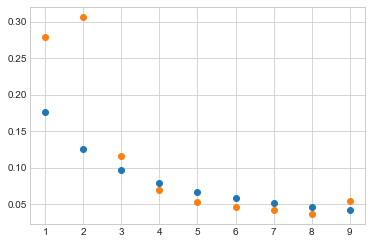

In [26]:
plt.plot(ds, pmf_ben, 'o')
plt.plot(ds, pmf[:,4,0], 'o')

print(mean_squared_error(pmf[:,4,0], pmf_ben))
print(mean_squared_error(pmf[:,5,0], pmf_ben))
print(mean_squared_error(pmf[:,6,0], pmf_ben))